In [56]:
import shapely
import pandas as pd
from shapely.geometry import LineString
import osmnx as ox
import geopandas as gpd
from numpy.linalg import norm
import numpy as np
import math
from matplotlib import pyplot as plt
import contextily as cx
from pyproj.crs import CRS
import scipy
from datetime import timedelta

from shapely.ops import linemerge

import route2vel
import route2vel.utils as utils
from route2vel.loading import load_graph
import route2vel
from notebookutils import *

from route2vel.interp import *
from route2vel.route import *
from route2vel.classes import *

In [57]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
plt.style.use('dark_background')
route2vel.load_config("../..")
ox.settings.use_cache = False

In [59]:
route_steps = ["Zola Predosa", "Castel San Pietro Terme"]

In [60]:
direction = route2vel.find_route_osrm(route_steps, load_graph=True, load_graph_name='test_route_1')

[WARN] Creating direction without a priori graph information, this is not recommended currently as it will likely lead to redownloading the graph each run after doing so.
Loading graph from /home/fillo/Documents/tesim/route2velpy/src/graph/test_route_1.graphnx.pickle ...
Loaded in 0.30s!


In [61]:
print(f"Route length: {len(direction.geometry)} (osm nodes: {len(direction.nodelist())})")

Route length: 28 (osm nodes: 63)


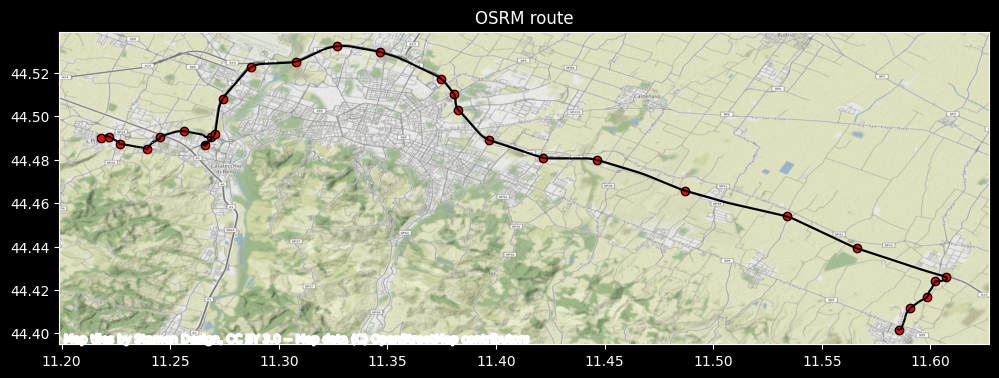

In [62]:
direction.plot()

In [63]:
direction.gdf.head()

,u,v,key,osmid,name,highway,oneway,reversed,length,geometry,...,travel_time,lanes,maxspeed,ref,bridge,junction,width,u_elevation,v_elevation,geometry2d
0,1232505111,2157317040,0,35028723,Via Risorgimento,secondary,False,True,17.142,"LINESTRING Z (11.21962 44.49088 80.00000, 11.2...",...,0.7,NaN,NaN,SP569R,NaN,NaN,NaN,80.0,81.0,"LINESTRING (11.21962 44.49088, 11.21983 44.49084)"
1,2157317040,1282818263,0,35028723,Via Risorgimento,secondary,False,True,36.508,"LINESTRING Z (11.21983 44.49084 81.00000, 11.2...",...,1.5,NaN,NaN,SP569R,NaN,NaN,NaN,81.0,79.0,"LINESTRING (11.21983 44.49084, 11.21993 44.490..."
2,1282818263,294149931,0,"[107202425, 1122798874, 35028723]",Via Risorgimento,secondary,False,True,119.127,"LINESTRING Z (11.22028 44.49078 79.00000, 11.2...",...,4.8,2,NaN,SP569R,yes,NaN,NaN,79.0,77.0,"LINESTRING (11.22028 44.49078, 11.22070 44.490..."
3,294149931,1426791897,0,79982521,Via Risorgimento,secondary,False,True,102.648,"LINESTRING Z (11.22176 44.49058 77.00000, 11.2...",...,4.1,NaN,NaN,SP569R,NaN,NaN,NaN,77.0,78.0,"LINESTRING (11.22176 44.49058, 11.22193 44.490..."
4,1426791897,5143086671,0,79982521,Via Risorgimento,secondary,False,True,123.070,"LINESTRING Z (11.22280 44.49004 78.00000, 11.2...",...,4.9,NaN,NaN,SP569R,NaN,NaN,NaN,78.0,83.0,"LINESTRING (11.22280 44.49004, 11.22332 44.489..."


In [64]:
interp_dir = route2vel.interp_from_route(direction)

In [65]:
meters_density = 5
pt_num = interp_dir.pt_num_for_density(meters_density)
print(f"For meters density {meters_density}m using {pt_num} points")

For meters density 5m using 8607 points


In [70]:
plot_gdf = interp_dir.get_gdf_to_plot(pt_num, continuous_lines=True)

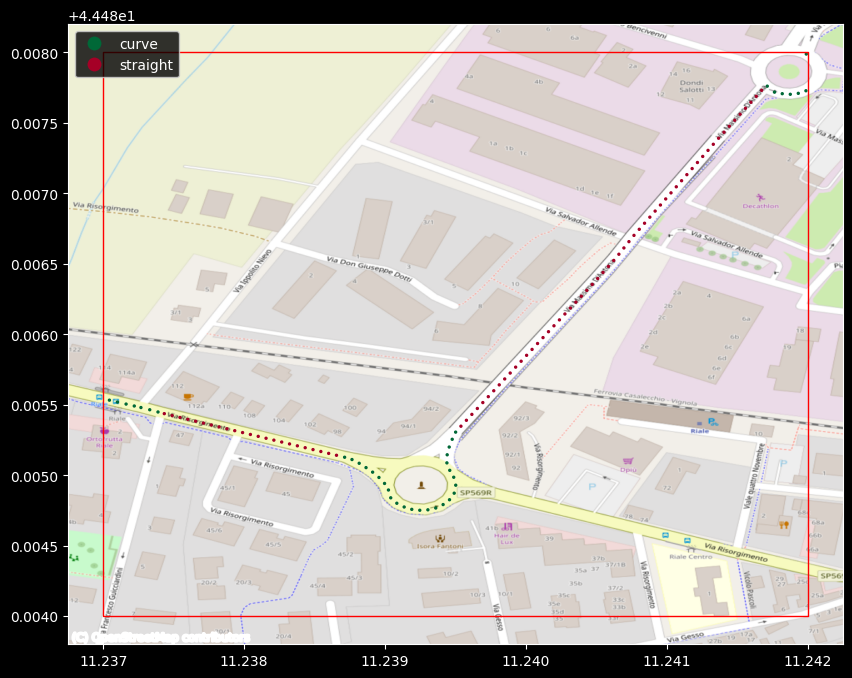

/home/fillo/Documents/tesim/.venv/lib/python3.11/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 20 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


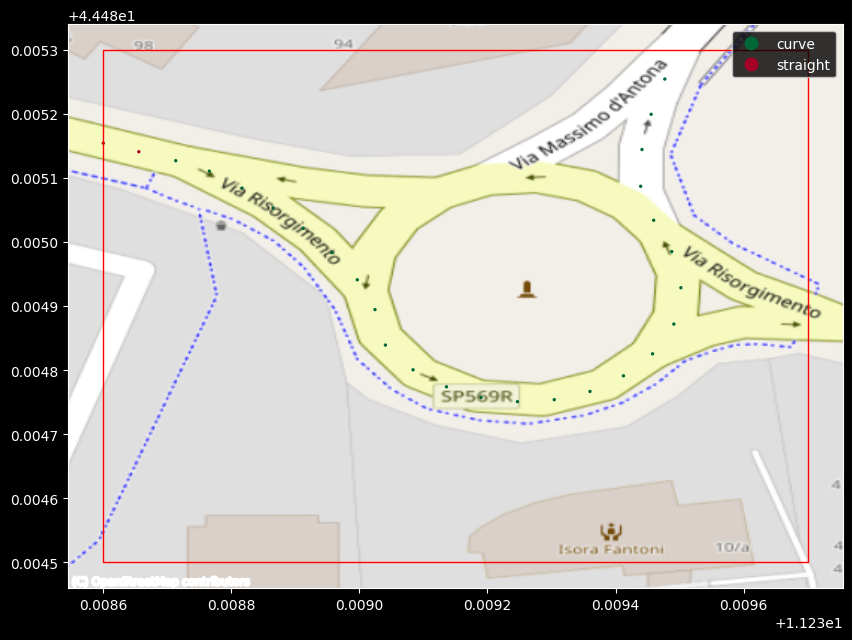

In [73]:
interesting_bound_set = [
    ((11.237, 44.484), (11.242, 44.488)),
    ((11.2386, 44.4845), (11.2397, 44.4853)),
]

for bounds in interesting_bound_set:
    display_bounded_shapes([
        # (route_interp_gdf, {'column': 'curve', 'categorical':True, 'legend':True, 'cmap':'RdYlGn_r'}),
        # (plot_gdf, {'column': 'curve', 'categorical':True, 'legend':True, 'cmap':'RdYlGn_r', 's': 1.5}),
        (plot_gdf, {'column': 'curve', 'categorical':True, 'legend':True, 'cmap':'RdYlGn_r', 's': 2}),
    ], *bounds, crs=plot_gdf.crs);

In [68]:
# Use 3d coord when making bezier
plot_gdf = interp_dir.get_gdf_to_plot(pt_num, continuous_lines=True, geom_key="geometry")
plot_gdf["z"] = plot_gdf["geometry"].apply(lambda x: x.z)

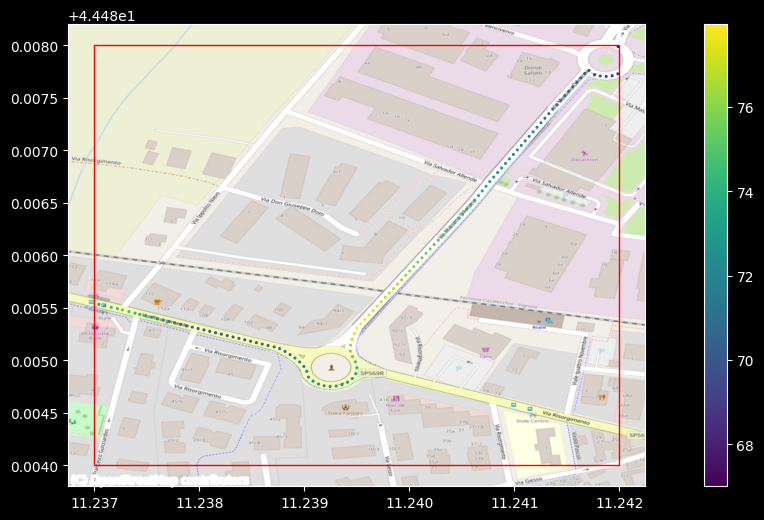

/home/fillo/Documents/tesim/.venv/lib/python3.11/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 20 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


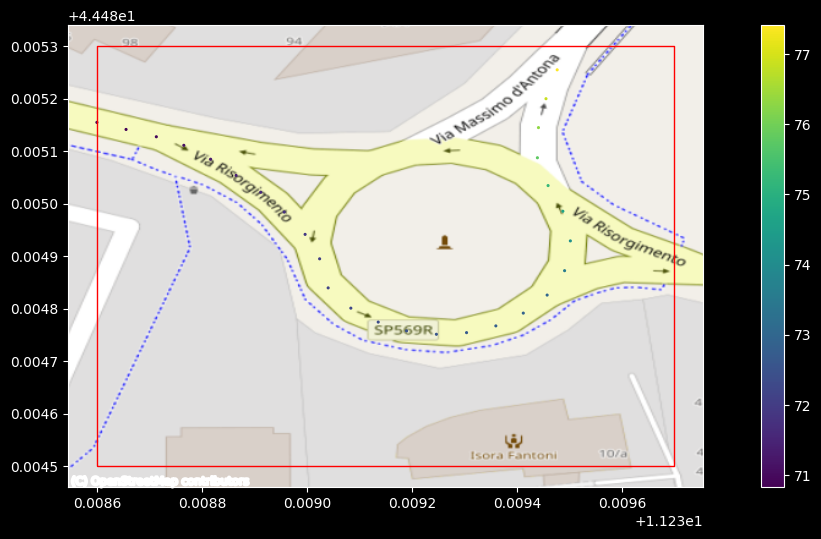

In [69]:
interesting_bound_set = [
    ((11.237, 44.484), (11.242, 44.488)),
    ((11.2386, 44.4845), (11.2397, 44.4853)),
]

for bounds in interesting_bound_set:
    display_bounded_shapes([
        # (route_interp_gdf, {'column': 'curve', 'categorical':True, 'legend':True, 'cmap':'RdYlGn_r'}),
        (plot_gdf, {'column': 'z', 'legend':True, 's': 1.5}),
    ], *bounds, crs=plot_gdf.crs, figsize=(15, 6));